In [17]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '3ff48f77-137e-43a4-856a-64eb2fa4d1f6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-12-30T20:05:06.938Z', 'error_code': 0, 'error_message': None, 'elapsed': 66, 'credit_count': 25, 'notice': None, 'total_count': 10490}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11853, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

In [19]:
type(data)

dict

In [21]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [23]:
# This normalize the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

id                              name symbol  \
0         1                           Bitcoin    BTC   
1      1027                          Ethereum    ETH   
2       825                       Tether USDt   USDT   
3        52                               XRP    XRP   
4      1839                               BNB    BNB   
...     ...                               ...    ...   
4995  12209                            Altair    AIR   
4996  34137                             Croak  CROAK   
4997  34803  Trump Was Right About Everything  TWRAE   
4998  34873                             Craze  CRAZE   
4999  28030                           Passage   PASG   

                                  slug  num_market_pairs  \
0                              bitcoin             11853   
1                             ethereum              9758   
2                               tether            110613   
3                                  xrp              1491   
4                                  bnb              2320   
...                                ...               ...   
4995                            altair                 7   
4996                             croak                 5   
4997  trump-was-right-about-everything                 1   
4998                             craze                 1   
4999                           passage                 9   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2013-08-04T00:00:00.000Z   
4     2017-07-25T00:00:00.000Z   
...                        ...   
4995  2021-09-30T02:07:41.000Z   
4996  2024-11-21T09:47:02.000Z   
4997  2024-12-20T16:28:26.000Z   
4998  2024-12-26T07:26:32.000Z   
4999  2023-09-14T06:54:58.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [stablecoin, asset-backed-stablecoin, avalanch...           NaN   
3     [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
4     [marketplace, centralized-exchange, payments, ...           NaN   
...                                                 ...           ...   
4995                     [polkadot, polkadot-ecosystem]           NaN   
4996                                            [memes]  2.015000e+09   
4997                               [pump-fun-ecosystem]  9.999668e+08   
4998                         [defi, ethereum-ecosystem]  1.000000e+09   
4999                                                 []           NaN   

      circulating_supply         total_supply  infinite_supply  platform  \
0           1.980341e+07             19803406            False       NaN   
1           1.204708e+08     120470757.053823             True       NaN   
2           1.389531e+11  143440125265.393372             True       NaN   
3           5.741023e+10          99986740020            False       NaN   
4           1.440071e+08         144007099.81            False       NaN   
...                  ...                  ...              ...       ...   
4995        0.000000e+00                    0            False       NaN   
4996        0.000000e+00           2015000000            False       NaN   
4997        0.000000e+00            999966818            False       NaN   
4998        0.000000e+00           1000000000            False       NaN   
4999        0.000000e+00           1304846670            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5            

In [83]:
# Passing df Into the Function

# Initializing df as an empty DataFrame
#df = pd.DataFrame()

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '3ff48f77-137e-43a4-856a-64eb2fa4d1f6',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    # Concatenating df2 with df
    #df = pd.concat([df, df2], ignore_index=True)

    if not os.path.isfile(r"/Users/manojvenkatesunmanoharan/Desktop/Certification/Python/API.csv"):
        df.to_csv(r"/Users/manojvenkatesunmanoharan/Desktop/Certification/Python/API.csv", header = 'column_names')
    else:
        df.to_csv(r"/Users/manojvenkatesunmanoharan/Desktop/Certification/Python/API.csv", mode = 'a', header = False)

In [85]:
import os
from time import time
from time import sleep

In [87]:
for i in range(333):
    api_runner()
    print('API Runner completed !!')
    sleep(60) # sleep for 1 min
exit()

API Runner completed !!
API Runner completed !!
API Runner completed !!


KeyboardInterrupt: 

In [89]:
df2 = pd.read_csv(r"/Users/manojvenkatesunmanoharan/Desktop/Certification/Python/API.csv")
df2

Unnamed: 0     id         name symbol       slug  num_market_pairs  \
0            0      1      Bitcoin    BTC    bitcoin             11853   
1            1   1027     Ethereum    ETH   ethereum              9759   
2            2    825  Tether USDt   USDT     tether            110613   
3            3     52          XRP    XRP        xrp              1491   
4            4   1839          BNB    BNB        bnb              2320   
5            5   5426       Solana    SOL     solana               816   
6            6     74     Dogecoin   DOGE   dogecoin              1136   
7            7   3408         USDC   USDC   usd-coin             24293   
8            8   2010      Cardano    ADA    cardano              1422   
9            9   1958         TRON    TRX       tron              1092   
10          10   5805    Avalanche   AVAX  avalanche               831   
11          11  11419      Toncoin    TON    toncoin               644   
12          12   1975    Chainlink   LINK  chainlink              1909   
13          13   5994    Shiba Inu   SHIB  shiba-inu               922   
14          14  20947          Sui    SUI        sui               499   
15           0      1      Bitcoin    BTC    bitcoin             11853   
16           1   1027     Ethereum    ETH   ethereum              9759   
17           2    825  Tether USDt   USDT     tether            110613   
18           3     52          XRP    XRP        xrp              1491   
19           4   1839          BNB    BNB        bnb              2320   
20           5   5426       Solana    SOL     solana               816   
21           6     74     Dogecoin   DOGE   dogecoin              1136   
22           7   3408         USDC   USDC   usd-coin             24293   
23           8   2010      Cardano    ADA    cardano              1422   
24           9   1958         TRON    TRX       tron              1092   
25          10   5805    Avalanche   AVAX  avalanche               831   
26          11  11419      Toncoin    TON    toncoin               644   
27          12   1975    Chainlink   LINK  chainlink              1909   
28          13   5994    Shiba Inu   SHIB  shiba-inu               922   
29          14  20947          Sui    SUI        sui               499   
30           0      1      Bitcoin    BTC    bitcoin             11853   
31           1   1027     Ethereum    ETH   ethereum              9759   
32           2    825  Tether USDt   USDT     tether            110613   
33           3     52          XRP    XRP        xrp              1491   
34           4   1839          BNB    BNB        bnb              2320   
35           5   5426       Solana    SOL     solana               816   
36           6     74     Dogecoin   DOGE   dogecoin              1136   
37           7   3408         USDC   USDC   usd-coin             24293   
38           8   2010      Cardano    ADA    cardano              1422   
39           9   1958         TRON    TRX       tron              1092   
40          10   5805    Avalanche   AVAX  avalanche               831   
41          11  11419      Toncoin    TON    toncoin               644   
42          12   1975    Chainlink   LINK  chainlink              1909   
43          13   5994    Shiba Inu   SHIB  shiba-inu               922   
44          14  20947          Sui    SUI        sui               499   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2013-08-04T00:00:00.000Z   
4   2017-07-25T00:00:00.000Z   
5   2020-04-10T00:00:00.000Z   
6   2013-12-15T00:00:00.000Z   
7   2018-10-08T00:00:00.000Z   
8   2017-10-01T00:00:00.000Z   
9   2017-09-13T00:00:00.000Z   
10  2020-07-13T00:00:00.000Z   
11  2021-08-26T13:40:22.000Z   
12  2017-09-20T00:00:00.000Z   
13  2020-08-01T00:00:00.000Z   
14  2022-07-12T08:03:11.000Z   
15  2010-07-13T00:00:00.000Z   
16  2015-08-07T00:00:00.000Z   
17  2015-02-25T00:00:00

In [91]:
pd.set_option('display.max_rows', None)
df

id         name symbol       slug  num_market_pairs  \
0       1      Bitcoin    BTC    bitcoin             11853   
1    1027     Ethereum    ETH   ethereum              9759   
2     825  Tether USDt   USDT     tether            110613   
3      52          XRP    XRP        xrp              1491   
4    1839          BNB    BNB        bnb              2320   
5    5426       Solana    SOL     solana               816   
6      74     Dogecoin   DOGE   dogecoin              1136   
7    3408         USDC   USDC   usd-coin             24293   
8    2010      Cardano    ADA    cardano              1422   
9    1958         TRON    TRX       tron              1092   
10   5805    Avalanche   AVAX  avalanche               831   
11  11419      Toncoin    TON    toncoin               644   
12   1975    Chainlink   LINK  chainlink              1909   
13   5994    Shiba Inu   SHIB  shiba-inu               922   
14  20947          Sui    SUI        sui               499   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2013-08-04T00:00:00.000Z   
4   2017-07-25T00:00:00.000Z   
5   2020-04-10T00:00:00.000Z   
6   2013-12-15T00:00:00.000Z   
7   2018-10-08T00:00:00.000Z   
8   2017-10-01T00:00:00.000Z   
9   2017-09-13T00:00:00.000Z   
10  2020-07-13T00:00:00.000Z   
11  2021-08-26T13:40:22.000Z   
12  2017-09-20T00:00:00.000Z   
13  2020-08-01T00:00:00.000Z   
14  2022-07-12T08:03:11.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [stablecoin, asset-backed-stablecoin, avalanch...           NaN   
3   [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
4   [marketplace, centralized-exchange, payments, ...           NaN   
5   [pos, platform, solana-ecosystem, cms-holdings...           NaN   
6   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
7   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
8   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
9   [media, payments, tron-ecosystem, layer-1, dwf...           NaN   
10  [defi, smart-contracts, three-arrows-capital-p...  7.157487e+08   
11  [pos, layer-1, ftx-bankruptcy-estate, dwf-labs...           NaN   
12  [platform, defi, oracles, smart-contracts, sub...           NaN   
13      [memes, ethereum-ecosystem, doggone-doggerel]           NaN   
14  [binance-launchpool, coinbase-ventures-portfol...  1.000000e+10   

    circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0         1.980341e+07  1.980341e+07            False       NaN         1   
1         1.204708e+08  1.204708e+08             True       NaN         2   
2         1.389531e+11  1.434401e+11             True       NaN         3   
3         5.741023e+10  9.998674e+10            False       NaN         4   
4         1.440071e+08  1.440071e+08            False       NaN         5   
5         4.797319e+08  5.912077e+08             True       NaN         6   
6         1.474196e+11  1.474196e+11             True       NaN         7   
7         4.374133e+10  4.374133e+10            False       NaN         8   
8         3.513189e+10  4.499511e+10            False       NaN         9   
9         8.619875e+10  8.619875e+10             True       NaN        10   
10        4.098802e+08  4.482165e+08            False       NaN        11   
11        2.552588e+09  5.118656e+09             True       NaN        12   
12        6.381000e+08  1.000000e+09            False       NaN        13   
13        5.892554e+14  5.895085e+14            False       NaN        14   
14        2.927660e+09  1.000000e+10            False       NaN        15   

   self_reported_circulating_supply self_reported_market_cap tvl_ratio  \
0                              None                     N

In [93]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [95]:
df

id         name symbol       slug  num_market_pairs  \
0       1      Bitcoin    BTC    bitcoin             11853   
1    1027     Ethereum    ETH   ethereum              9759   
2     825  Tether USDt   USDT     tether            110613   
3      52          XRP    XRP        xrp              1491   
4    1839          BNB    BNB        bnb              2320   
5    5426       Solana    SOL     solana               816   
6      74     Dogecoin   DOGE   dogecoin              1136   
7    3408         USDC   USDC   usd-coin             24293   
8    2010      Cardano    ADA    cardano              1422   
9    1958         TRON    TRX       tron              1092   
10   5805    Avalanche   AVAX  avalanche               831   
11  11419      Toncoin    TON    toncoin               644   
12   1975    Chainlink   LINK  chainlink              1909   
13   5994    Shiba Inu   SHIB  shiba-inu               922   
14  20947          Sui    SUI        sui               499   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2013-08-04T00:00:00.000Z   
4   2017-07-25T00:00:00.000Z   
5   2020-04-10T00:00:00.000Z   
6   2013-12-15T00:00:00.000Z   
7   2018-10-08T00:00:00.000Z   
8   2017-10-01T00:00:00.000Z   
9   2017-09-13T00:00:00.000Z   
10  2020-07-13T00:00:00.000Z   
11  2021-08-26T13:40:22.000Z   
12  2017-09-20T00:00:00.000Z   
13  2020-08-01T00:00:00.000Z   
14  2022-07-12T08:03:11.000Z   

                                                 tags         max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...     21000000.00000   
1   [pos, smart-contracts, ethereum-ecosystem, coi...                NaN   
2   [stablecoin, asset-backed-stablecoin, avalanch...                NaN   
3   [medium-of-exchange, enterprise-solutions, arr... 100000000000.00000   
4   [marketplace, centralized-exchange, payments, ...                NaN   
5   [pos, platform, solana-ecosystem, cms-holdings...                NaN   
6   [mineable, pow, scrypt, medium-of-exchange, me...                NaN   
7   [medium-of-exchange, stablecoin, asset-backed-...                NaN   
8   [dpos, pos, platform, research, smart-contract...  45000000000.00000   
9   [media, payments, tron-ecosystem, layer-1, dwf...                NaN   
10  [defi, smart-contracts, three-arrows-capital-p...    715748719.00000   
11  [pos, layer-1, ftx-bankruptcy-estate, dwf-labs...                NaN   
12  [platform, defi, oracles, smart-contracts, sub...                NaN   
13      [memes, ethereum-ecosystem, doggone-doggerel]                NaN   
14  [binance-launchpool, coinbase-ventures-portfol...  10000000000.00000   

      circulating_supply          total_supply  infinite_supply  platform  \
0         19803406.00000        19803406.00000            False       NaN   
1        120470757.05382       120470757.05382             True       NaN   
2     138953076766.05234    143440125265.39337             True       NaN   
3      57410227039.00000     99986740020.00000            False       NaN   
4        144007098.95000       144007098.95000            False       NaN   
5        479731926.70662       591207668.42731             True       NaN   
6     147419576383.70526    147419576383.70526             True       NaN   
7      43741333573.55579     43741333573.55579            False       NaN   
8      35131891445.17966     44995113979.40014            False       NaN   
9      86198746744.66170     86198751817.70415             True       NaN   
10       409880237.79675       448216537.79675            False       NaN   
11      2552588374.01536      5118656324.11629             True       NaN   
12       638099970.45279      1000000000.00000            False       NaN   
13 589255408884186.12500 589508509350970.87500            False       NaN   
14      2927660018.55889     10000000000.00000            False       NaN   

    cmc_rank self_reported_circulating_supply self_

In [99]:
df3 = df.groupby('name', sort = False)[["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d","quote.USD.percent_change_60d", "quote.USD.percent_change_90d" ]].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                     
Bitcoin                          0.03002                       1.02987   
Ethereum                        -0.21757                       1.76878   
Tether USDt                     -0.00948                       0.06744   
XRP                              0.67261                      -0.20701   
BNB                              0.06395                       2.19533   
Solana                          -0.39460                       2.44218   
Dogecoin                         0.37442                       2.17735   
USDC                             0.00190                      -0.00221   
Cardano                          0.86326                       1.88590   
TRON                             0.39123                      -0.99176   
Avalanche                        0.12452                       2.67739   
Toncoin                          0.23987                      -0.35497   
Chainlink                        0.51522                       0.76715   
Shiba Inu                        0.08072                       0.23049   
Sui                             -1.35305                       5.21169   

             quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                     
Bitcoin                          1.44277                      -2.82300   
Ethereum                         0.65652                      -8.36523   
Tether USDt                      0.02235                      -0.19399   
XRP                             -5.17170                      11.35582   
BNB                              3.06390                       8.15457   
Solana                           2.77203                     -18.82867   
Dogecoin                        -0.27272                     -25.05266   
USDC                            -0.00448                      -0.01631   
Cardano                         -4.45046                     -19.93367   
TRON                             1.94580                      23.74343   
Avalanche                       -3.45838                     -19.07433   
Toncoin                          1.01219                     -18.32995   
Chainlink                      -12.07340                       9.30801   
Shiba Inu                       -3.44190                     -19.85762   
Sui                             -3.99592                      21.57030   

             quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                     
Bitcoin                          34.39796                      56.22399  
Ethereum                         34.77895                      39.74521  
Tether USDt                       0.01566                      -0.12111  
XRP                             315.58109                     250.41884  
BNB                              23.43061                      31.19859  
Solana                           15.06423                      36.36749  
Dogecoin                        100.31450                     205.16220  
USDC                              0.01052                      -0.02013  
Cardano                         154.52555                     150.28135  
TRON                             52.12376                      66.83272  
Avalanche                        47.95607                      43.57059  
Toncoin                          17.16795                       6.26392  
Chainlink                        85.35415                      92.74587  
Shiba Inu                        20.24294                      34.44534  
Sui                             116.18074                     149.78477

In [107]:
index = pd.Index(range(90))
df4 = df3.stack()
df4 = df4.to_frame(name = 'values')
df4

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.03002
            quote.USD.percent_change_24h   1.02987
            quote.USD.percent_change_7d    1.44277
            quote.USD.percent_change_30d  -2.82300
            quote.USD.percent_change_60d  34.39796
            quote.USD.percent_change_90d  56.22399
Ethereum    quote.USD.percent_change_1h   -0.21757
            quote.USD.percent_change_24h   1.76878
            quote.USD.percent_change_7d    0.65652
            quote.USD.percent_change_30d  -8.36523
            quote.USD.percent_change_60d  34.77895
            quote.USD.percent_change_90d  39.74521
Tether USDt quote.USD.percent_change_1h   -0.00948
            quote.USD.percent_change_24h   0.06744
            quote.USD.percent_change_7d    0.02235
            quote.USD.percent_change_30d  -0.19399
            quote.USD.percent_change_60d   0.01566
            quote.USD.percent_change_90d  -0.12111
XRP         quote.USD.percent_change_1h    0.67261
            quote.USD.percent_change_24h  -0.20701
            quote.USD.percent_change_7d   -5.17170
            quote.USD.percent_change_30d  11.35582
            quote.USD.percent_change_60d 315.58109
            quote.USD.percent_change_90d 250.41884
BNB         quote.USD.percent_change_1h    0.06395
            quote.USD.percent_change_24h   2.19533
            quote.USD.percent_change_7d    3.06390
            quote.USD.percent_change_30d   8.15457
            quote.USD.percent_change_60d  23.43061
            quote.USD.percent_change_90d  31.19859
Solana      quote.USD.percent_change_1h   -0.39460
            quote.USD.percent_change_24h   2.44218
            quote.USD.percent_change_7d    2.77203
            quote.USD.percent_change_30d -18.82867
            quote.USD.percent_change_60d  15.06423
            quote.USD.percent_change_90d  36.36749
Dogecoin    quote.USD.percent_change_1h    0.37442
            quote.USD.percent_change_24h   2.17735
            quote.USD.percent_change_7d   -0.27272
            quote.USD.percent_change_30d -25.05266
            quote.USD.percent_change_60d 100.31450
            quote.USD.percent_change_90d 205.16220
USDC        quote.USD.percent_change_1h    0.00190
            quote.USD.percent_change_24h  -0.00221
            quote.USD.percent_change_7d   -0.00448
            quote.USD.percent_change_30d  -0.01631
            quote.USD.percent_change_60d   0.01052
            quote.USD.percent_change_90d  -0.02013
Cardano     quote.USD.percent_change_1h    0.86326
            quote.USD.percent_change_24h   1.88590
            quote.USD.percent_change_7d   -4.45046
            quote.USD.percent_change_30d -19.93367
            quote.USD.percent_change_60d 154.52555
            quote.USD.percent_change_90d 150.28135
TRON        quote.USD.percent_change_1h    0.39123
            quote.USD.percent_change_24h  -0.99176
            quote.USD.percent_change_7d    1.94580
            quote.USD.percent_change_30d  23.74343
            quote.USD.percent_change_60d  52.12376
            quote.USD.percent_change_90d  66.83272
Avalanche   quote.USD.percent_change_1h    0.12452
            quote.USD.percent_change_24h   2.67739
            quote.USD.percent_change_7d   -3.45838
            quote.USD.percent_change_30d -19.07433
            quote.USD.percent_change_60d  47.95607
            quote.USD.percent_change_90d  43.57059
Toncoin     quote.USD.percent_change_1h    0.23987
            quote.USD.percent_change_24h  -0.35497
            quote.USD.percent_change_7d    1.01219
            quote.USD.percent_change_30d -18.32995
            quote.USD.percent_change_60d  17.16795
            quote.USD.percent_change_90d   6.26392
Chainlink   quote.USD.percent_change_1h    0.51522
            quote.USD.percent_change_24h   0.76715
            quote.USD.percent_change_7d  -12.07340
            quote.USD.percent_change_30d   9.30801
            quote.USD.percent_change_60d  85.35415
            quo

In [109]:
df5 = df4.reset_index()
df5

name                       level_1    values
0       Bitcoin   quote.USD.percent_change_1h   0.03002
1       Bitcoin  quote.USD.percent_change_24h   1.02987
2       Bitcoin   quote.USD.percent_change_7d   1.44277
3       Bitcoin  quote.USD.percent_change_30d  -2.82300
4       Bitcoin  quote.USD.percent_change_60d  34.39796
5       Bitcoin  quote.USD.percent_change_90d  56.22399
6      Ethereum   quote.USD.percent_change_1h  -0.21757
7      Ethereum  quote.USD.percent_change_24h   1.76878
8      Ethereum   quote.USD.percent_change_7d   0.65652
9      Ethereum  quote.USD.percent_change_30d  -8.36523
10     Ethereum  quote.USD.percent_change_60d  34.77895
11     Ethereum  quote.USD.percent_change_90d  39.74521
12  Tether USDt   quote.USD.percent_change_1h  -0.00948
13  Tether USDt  quote.USD.percent_change_24h   0.06744
14  Tether USDt   quote.USD.percent_change_7d   0.02235
15  Tether USDt  quote.USD.percent_change_30d  -0.19399
16  Tether USDt  quote.USD.percent_change_60d   0.01566
17  Tether USDt  quote.USD.percent_change_90d  -0.12111
18          XRP   quote.USD.percent_change_1h   0.67261
19          XRP  quote.USD.percent_change_24h  -0.20701
20          XRP   quote.USD.percent_change_7d  -5.17170
21          XRP  quote.USD.percent_change_30d  11.35582
22          XRP  quote.USD.percent_change_60d 315.58109
23          XRP  quote.USD.percent_change_90d 250.41884
24          BNB   quote.USD.percent_change_1h   0.06395
25          BNB  quote.USD.percent_change_24h   2.19533
26          BNB   quote.USD.percent_change_7d   3.06390
27          BNB  quote.USD.percent_change_30d   8.15457
28          BNB  quote.USD.percent_change_60d  23.43061
29          BNB  quote.USD.percent_change_90d  31.19859
30       Solana   quote.USD.percent_change_1h  -0.39460
31       Solana  quote.USD.percent_change_24h   2.44218
32       Solana   quote.USD.percent_change_7d   2.77203
33       Solana  quote.USD.percent_change_30d -18.82867
34       Solana  quote.USD.percent_change_60d  15.06423
35       Solana  quote.USD.percent_change_90d  36.36749
36     Dogecoin   quote.USD.percent_change_1h   0.37442
37     Dogecoin  quote.USD.percent_change_24h   2.17735
38     Dogecoin   quote.USD.percent_change_7d  -0.27272
39     Dogecoin  quote.USD.percent_change_30d -25.05266
40     Dogecoin  quote.USD.percent_change_60d 100.31450
41     Dogecoin  quote.USD.percent_change_90d 205.16220
42         USDC   quote.USD.percent_change_1h   0.00190
43         USDC  quote.USD.percent_change_24h  -0.00221
44         USDC   quote.USD.percent_change_7d  -0.00448
45         USDC  quote.USD.percent_change_30d  -0.01631
46         USDC  quote.USD.percent_change_60d   0.01052
47         USDC  quote.USD.percent_change_90d  -0.02013
48      Cardano   quote.USD.percent_change_1h   0.86326
49      Cardano  quote.USD.percent_change_24h   1.88590
50      Cardano   quote.USD.percent_change_7d  -4.45046
51      Cardano  quote.USD.percent_change_30d -19.93367
52      Cardano  quote.USD.percent_change_60d 154.52555
53      Cardano  quote.USD.percent_change_90d 150.28135
54         TRON   quote.USD.percent_change_1h   0.39123
55         TRON  quote.USD.percent_change_24h  -0.99176
56         TRON   quote.USD.percent_change_7d   1.94580
57         TRON  quote.USD.percent_change_30d  23.74343
58         TRON  quote.USD.percent_change_60d  52.12376
59         TRON  quote.USD.percent_change_90d  66.83272
60    Avalanche   quote.USD.percent_change_1h   0.12452
61    Avalanche  quote.USD.percent_change_24h   2.67739
62    Avalanche   quote.USD.percent_change_7d  -3.45838
63    Avalanche  quote.USD.percent_change_30d -19.07433
64    Avalanche  quote.USD.percent_change_60d  47.95607
65    Avalanche  quote.USD.percent_change_90d  43.57059
66      Toncoin   quote.USD.percent_change_1h   0.23987
67      Toncoin  quote.USD.percent_change_24h  -0.35497
68      Toncoin   quote.USD.percent_change_7d   1.01219
69      Toncoin  quote.USD.percent_change_30d -18.32995
70      Toncoin  quote.USD.percent_

In [127]:
df6 = df5.rename(columns = {'level_1': 'percent_change'})

In [129]:
df6

name                 percent_chage    values
0       Bitcoin   quote.USD.percent_change_1h   0.03002
1       Bitcoin  quote.USD.percent_change_24h   1.02987
2       Bitcoin   quote.USD.percent_change_7d   1.44277
3       Bitcoin  quote.USD.percent_change_30d  -2.82300
4       Bitcoin  quote.USD.percent_change_60d  34.39796
5       Bitcoin  quote.USD.percent_change_90d  56.22399
6      Ethereum   quote.USD.percent_change_1h  -0.21757
7      Ethereum  quote.USD.percent_change_24h   1.76878
8      Ethereum   quote.USD.percent_change_7d   0.65652
9      Ethereum  quote.USD.percent_change_30d  -8.36523
10     Ethereum  quote.USD.percent_change_60d  34.77895
11     Ethereum  quote.USD.percent_change_90d  39.74521
12  Tether USDt   quote.USD.percent_change_1h  -0.00948
13  Tether USDt  quote.USD.percent_change_24h   0.06744
14  Tether USDt   quote.USD.percent_change_7d   0.02235
15  Tether USDt  quote.USD.percent_change_30d  -0.19399
16  Tether USDt  quote.USD.percent_change_60d   0.01566
17  Tether USDt  quote.USD.percent_change_90d  -0.12111
18          XRP   quote.USD.percent_change_1h   0.67261
19          XRP  quote.USD.percent_change_24h  -0.20701
20          XRP   quote.USD.percent_change_7d  -5.17170
21          XRP  quote.USD.percent_change_30d  11.35582
22          XRP  quote.USD.percent_change_60d 315.58109
23          XRP  quote.USD.percent_change_90d 250.41884
24          BNB   quote.USD.percent_change_1h   0.06395
25          BNB  quote.USD.percent_change_24h   2.19533
26          BNB   quote.USD.percent_change_7d   3.06390
27          BNB  quote.USD.percent_change_30d   8.15457
28          BNB  quote.USD.percent_change_60d  23.43061
29          BNB  quote.USD.percent_change_90d  31.19859
30       Solana   quote.USD.percent_change_1h  -0.39460
31       Solana  quote.USD.percent_change_24h   2.44218
32       Solana   quote.USD.percent_change_7d   2.77203
33       Solana  quote.USD.percent_change_30d -18.82867
34       Solana  quote.USD.percent_change_60d  15.06423
35       Solana  quote.USD.percent_change_90d  36.36749
36     Dogecoin   quote.USD.percent_change_1h   0.37442
37     Dogecoin  quote.USD.percent_change_24h   2.17735
38     Dogecoin   quote.USD.percent_change_7d  -0.27272
39     Dogecoin  quote.USD.percent_change_30d -25.05266
40     Dogecoin  quote.USD.percent_change_60d 100.31450
41     Dogecoin  quote.USD.percent_change_90d 205.16220
42         USDC   quote.USD.percent_change_1h   0.00190
43         USDC  quote.USD.percent_change_24h  -0.00221
44         USDC   quote.USD.percent_change_7d  -0.00448
45         USDC  quote.USD.percent_change_30d  -0.01631
46         USDC  quote.USD.percent_change_60d   0.01052
47         USDC  quote.USD.percent_change_90d  -0.02013
48      Cardano   quote.USD.percent_change_1h   0.86326
49      Cardano  quote.USD.percent_change_24h   1.88590
50      Cardano   quote.USD.percent_change_7d  -4.45046
51      Cardano  quote.USD.percent_change_30d -19.93367
52      Cardano  quote.USD.percent_change_60d 154.52555
53      Cardano  quote.USD.percent_change_90d 150.28135
54         TRON   quote.USD.percent_change_1h   0.39123
55         TRON  quote.USD.percent_change_24h  -0.99176
56         TRON   quote.USD.percent_change_7d   1.94580
57         TRON  quote.USD.percent_change_30d  23.74343
58         TRON  quote.USD.percent_change_60d  52.12376
59         TRON  quote.USD.percent_change_90d  66.83272
60    Avalanche   quote.USD.percent_change_1h   0.12452
61    Avalanche  quote.USD.percent_change_24h   2.67739
62    Avalanche   quote.USD.percent_change_7d  -3.45838
63    Avalanche  quote.USD.percent_change_30d -19.07433
64    Avalanche  quote.USD.percent_change_60d  47.95607
65    Avalanche  quote.USD.percent_change_90d  43.57059
66      Toncoin   quote.USD.percent_change_1h   0.23987
67      Toncoin  quote.USD.percent_change_24h  -0.35497
68      Toncoin   quote.USD.percent_change_7d   1.01219
69      Toncoin  quote.USD.percent_change_30d -18.32995
70      Toncoin  quote.USD.percent_

In [143]:
df6['percent_chage'] = df6['percent_chage'].replace(['quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d', ], ['24hr', '7d', '30d', '60d', '90d'])
df6

name percent_chage    values
0       Bitcoin           1hr   0.03002
1       Bitcoin          24hr   1.02987
2       Bitcoin            7d   1.44277
3       Bitcoin           30d  -2.82300
4       Bitcoin           60d  34.39796
5       Bitcoin           90d  56.22399
6      Ethereum           1hr  -0.21757
7      Ethereum          24hr   1.76878
8      Ethereum            7d   0.65652
9      Ethereum           30d  -8.36523
10     Ethereum           60d  34.77895
11     Ethereum           90d  39.74521
12  Tether USDt           1hr  -0.00948
13  Tether USDt          24hr   0.06744
14  Tether USDt            7d   0.02235
15  Tether USDt           30d  -0.19399
16  Tether USDt           60d   0.01566
17  Tether USDt           90d  -0.12111
18          XRP           1hr   0.67261
19          XRP          24hr  -0.20701
20          XRP            7d  -5.17170
21          XRP           30d  11.35582
22          XRP           60d 315.58109
23          XRP           90d 250.41884
24          BNB           1hr   0.06395
25          BNB          24hr   2.19533
26          BNB            7d   3.06390
27          BNB           30d   8.15457
28          BNB           60d  23.43061
29          BNB           90d  31.19859
30       Solana           1hr  -0.39460
31       Solana          24hr   2.44218
32       Solana            7d   2.77203
33       Solana           30d -18.82867
34       Solana           60d  15.06423
35       Solana           90d  36.36749
36     Dogecoin           1hr   0.37442
37     Dogecoin          24hr   2.17735
38     Dogecoin            7d  -0.27272
39     Dogecoin           30d -25.05266
40     Dogecoin           60d 100.31450
41     Dogecoin           90d 205.16220
42         USDC           1hr   0.00190
43         USDC          24hr  -0.00221
44         USDC            7d  -0.00448
45         USDC           30d  -0.01631
46         USDC           60d   0.01052
47         USDC           90d  -0.02013
48      Cardano           1hr   0.86326
49      Cardano          24hr   1.88590
50      Cardano            7d  -4.45046
51      Cardano           30d -19.93367
52      Cardano           60d 154.52555
53      Cardano           90d 150.28135
54         TRON           1hr   0.39123
55         TRON          24hr  -0.99176
56         TRON            7d   1.94580
57         TRON           30d  23.74343
58         TRON           60d  52.12376
59         TRON           90d  66.83272
60    Avalanche           1hr   0.12452
61    Avalanche          24hr   2.67739
62    Avalanche            7d  -3.45838
63    Avalanche           30d -19.07433
64    Avalanche           60d  47.95607
65    Avalanche           90d  43.57059
66      Toncoin           1hr   0.23987
67      Toncoin          24hr  -0.35497
68      Toncoin            7d   1.01219
69      Toncoin           30d -18.32995
70      Toncoin           60d  17.16795
71      Toncoin           90d   6.26392
72    Chainlink           1hr   0.51522
73    Chainlink          24hr   0.76715
74    Chainlink            7d -12.07340
75    Chainlink           30d   9.30801
76    Chainlink           60d  85.35415
77    Chainlink           90d  92.74587
78    Shiba Inu           1hr   0.08072
79    Shiba Inu          24hr   0.23049
80    Shiba Inu            7d  -3.44190
81    Shiba Inu           30d -19.85762
82    Shiba Inu           60d  20.24294
83    Shiba Inu           90d  34.44534
84          Sui           1hr  -1.35305
85          Sui          24hr   5.21169
86          Sui            7d  -3.99592
87          Sui           30d  21.57030
88          Sui           60d 116.18074
89          Sui           90d 149.78477

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

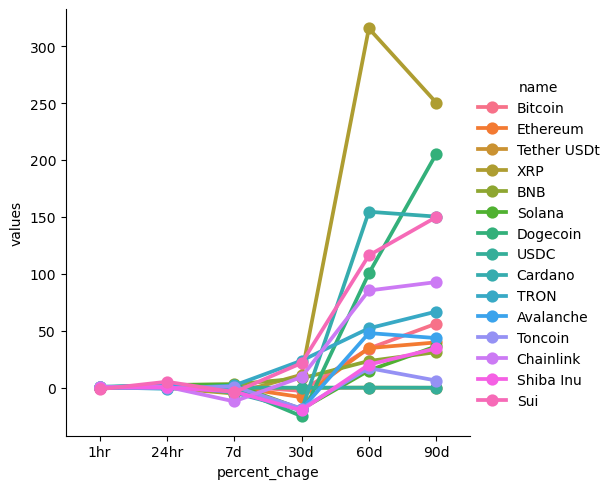

In [147]:
sns.catplot(x = 'percent_chage', y = 'values', hue = 'name', data = df6, kind = 'point')

In [165]:
df7 = df[['name', 'quote.USD.price', 'timestamp']]
#df7 = df7.query("name == 'Bitcoin'")
df7

name  quote.USD.price                  timestamp
0       Bitcoin      94230.27740 2024-12-30 12:42:00.822062
1      Ethereum       3394.14530 2024-12-30 12:42:00.822062
2   Tether USDt          0.99874 2024-12-30 12:42:00.822062
3           XRP          2.11168 2024-12-30 12:42:00.822062
4           BNB        708.74293 2024-12-30 12:42:00.822062
5        Solana        195.07710 2024-12-30 12:42:00.822062
6      Dogecoin          0.32012 2024-12-30 12:42:00.822062
7          USDC          0.99995 2024-12-30 12:42:00.822062
8       Cardano          0.87264 2024-12-30 12:42:00.822062
9          TRON          0.25562 2024-12-30 12:42:00.822062
10    Avalanche         36.79650 2024-12-30 12:42:00.822062
11      Toncoin          5.62468 2024-12-30 12:42:00.822062
12    Chainlink         21.12805 2024-12-30 12:42:00.822062
13    Shiba Inu          0.00002 2024-12-30 12:42:00.822062
14          Sui          4.26960 2024-12-30 12:42:00.822062

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

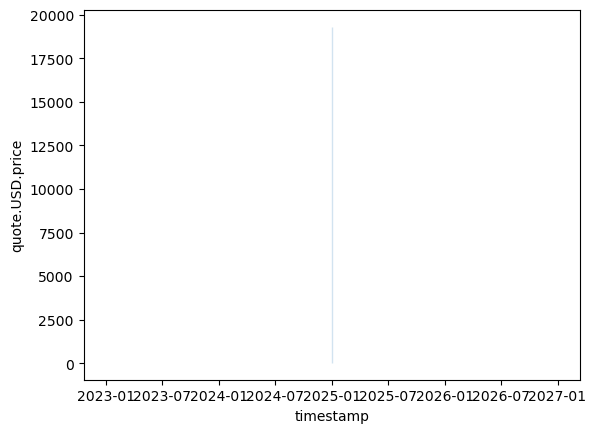

In [169]:
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df7)